In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

os.chdir("D:/PAULAMI/GIM/GIM Documents/Documents/Certificates/Coursera Courses/IBM Machine Learning Professional Certificate/Courses/4. Unsupervised Machine Learning/Week 3/Final Project")

In [2]:
data_main = pd.read_csv("D:/PAULAMI/GIM/GIM Documents/Documents/Certificates/Coursera Courses/IBM Machine Learning Professional Certificate/Courses/4. Unsupervised Machine Learning/Week 3/Final Project/Country-data.csv")

In [3]:
data = pd.read_csv("D:/PAULAMI/GIM/GIM Documents/Documents/Certificates/Coursera Courses/IBM Machine Learning Professional Certificate/Courses/4. Unsupervised Machine Learning/Week 3/Final Project/Country-data.csv")

In [4]:
data.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [5]:
data.shape

(167, 10)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
data = data.drop(columns='country')

In [8]:
data = data.astype('float64')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    float64
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    float64
dtypes: float64(9)
memory usage: 11.9 KB


In [10]:
data.head()

child_mort  exports  health  imports   income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9   1610.0       9.44        56.2   
1        16.6     28.0    6.55     48.6   9930.0       4.49        76.3   
2        27.3     38.4    4.17     31.4  12900.0      16.10        76.5   
3       119.0     62.3    2.85     42.9   5900.0      22.40        60.1   
4        10.3     45.5    6.03     58.9  19100.0       1.44        76.8   

   total_fer     gdpp  
0       5.82    553.0  
1       1.65   4090.0  
2       2.89   4460.0  
3       6.16   3530.0  
4       2.13  12200.0

In [11]:
data.isnull().any()

child_mort    False
exports       False
health        False
imports       False
income        False
inflation     False
life_expec    False
total_fer     False
gdpp          False
dtype: bool

In [12]:
data.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

Income, GDPP and Child mortality have higher mean than the 50 percentile indicating a heavily right skewed histogram.

Also, Inflation ranges from negative values to high positive values. This suggests there might be distant outliers.

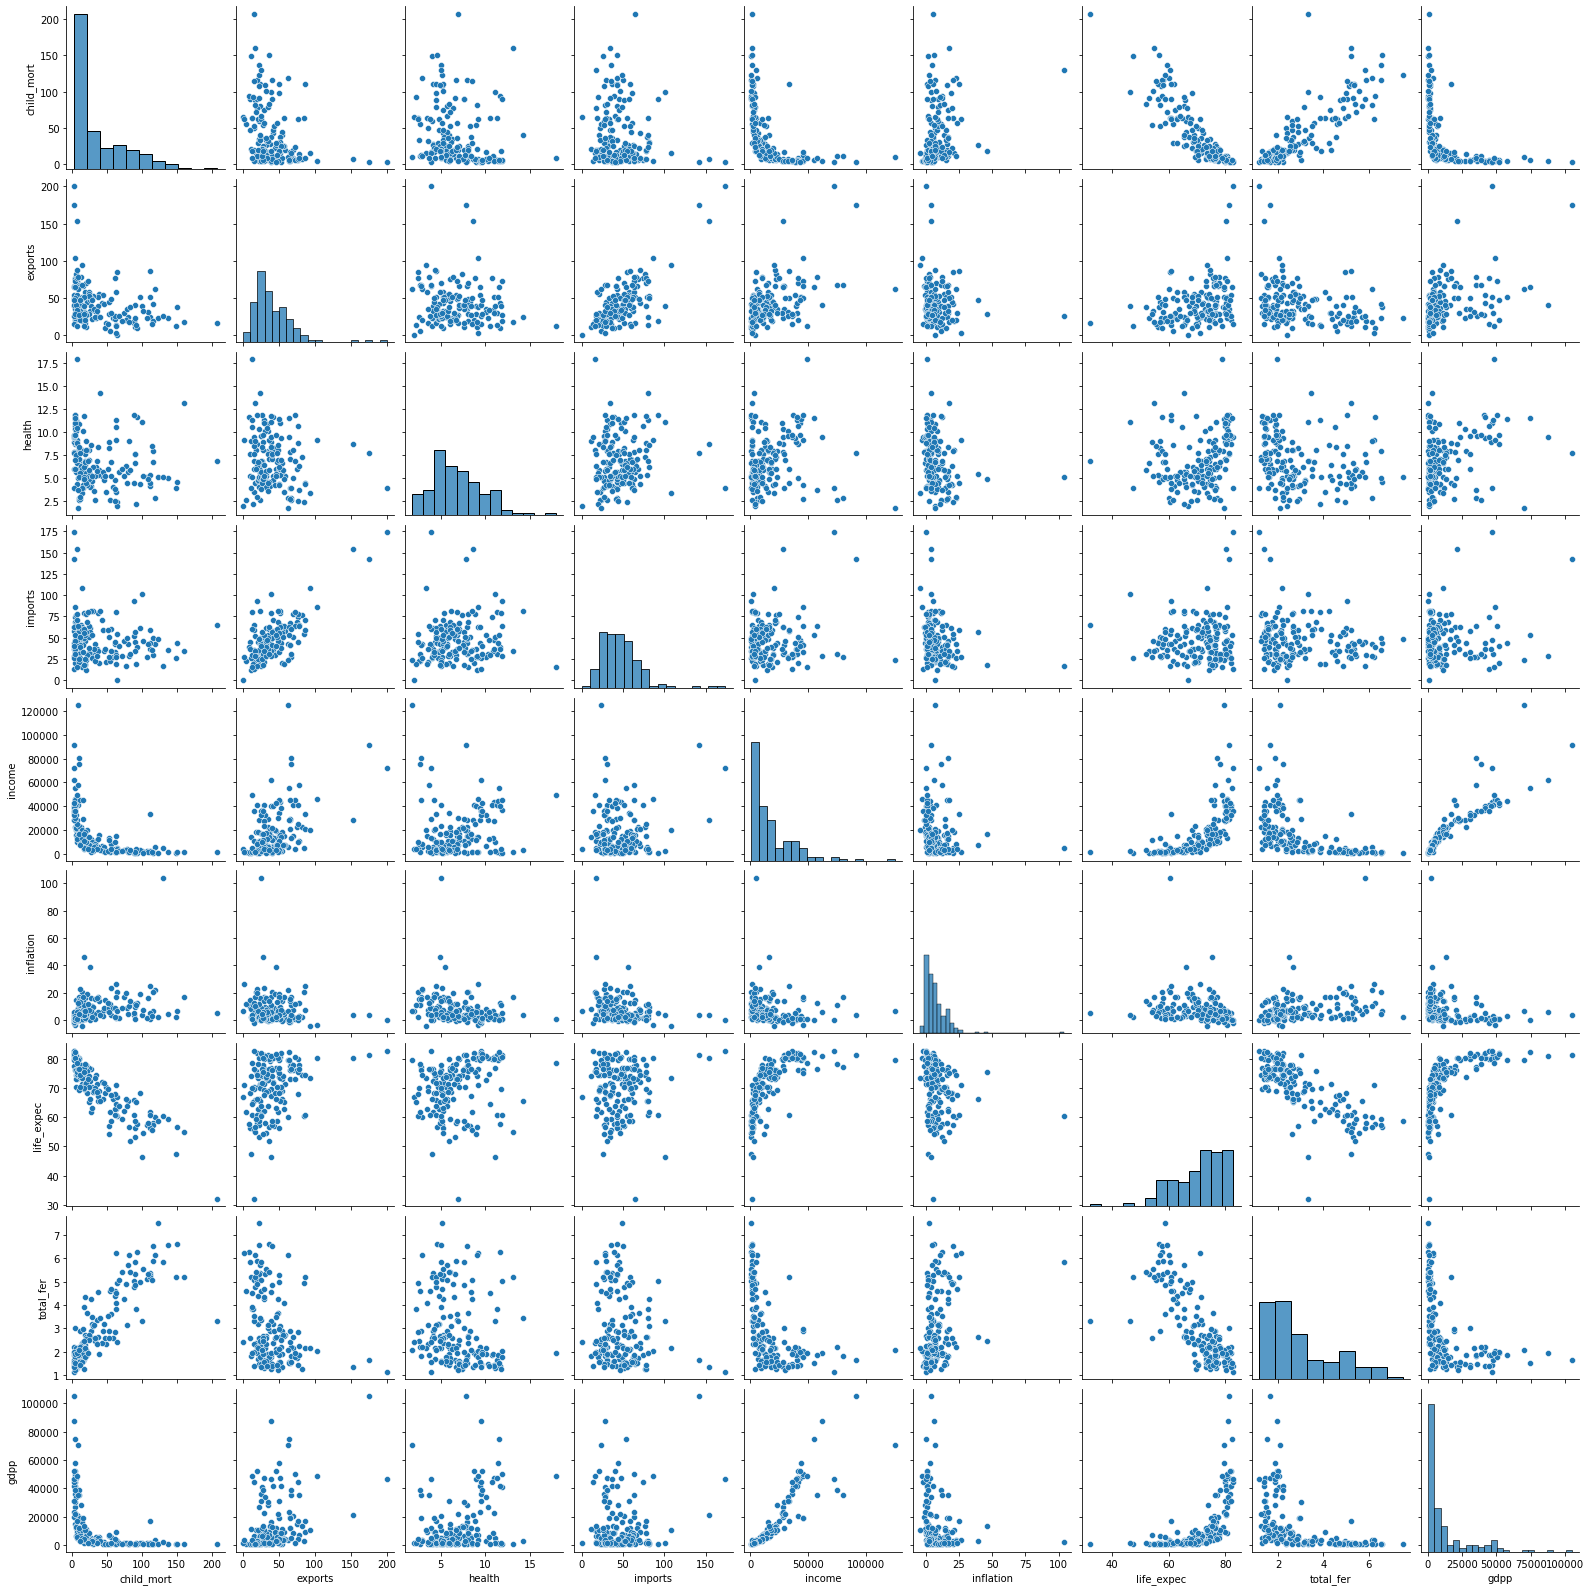

In [13]:
sns.pairplot(data)

#### Histograms:
 - Most of the data is right skewed except for life expectancy which is right skewed.

 - There are two peaks in GDPP and total fertility suggesting at least 2 clusters can be formed in the data.

 - All of the plots suggest there are outliers.

#### Scatter Plot:
 - Income and GDPP seems to have high correlation.

 - All Countries with higher GDPP have low child mortality and high life expectancy and lower inflation.

 - Also, all countries with higher income have lower child mortality

 - There is a slight positive correlation between imports and exports.

In [14]:
data.corr()

child_mort   exports    health   imports    income  inflation  \
child_mort    1.000000 -0.318093 -0.200402 -0.127211 -0.524315   0.288276   
exports      -0.318093  1.000000 -0.114408  0.737381  0.516784  -0.107294   
health       -0.200402 -0.114408  1.000000  0.095717  0.129579  -0.255376   
imports      -0.127211  0.737381  0.095717  1.000000  0.122406  -0.246994   
income       -0.524315  0.516784  0.129579  0.122406  1.000000  -0.147756   
inflation     0.288276 -0.107294 -0.255376 -0.246994 -0.147756   1.000000   
life_expec   -0.886676  0.316313  0.210692  0.054391  0.611962  -0.239705   
total_fer     0.848478 -0.320011 -0.196674 -0.159048 -0.501840   0.316921   
gdpp         -0.483032  0.418725  0.345966  0.115498  0.895571  -0.221631   

            life_expec  total_fer      gdpp  
child_mort   -0.886676   0.848478 -0.483032  
exports       0.316313  -0.320011  0.418725  
health        0.210692  -0.196674  0.345966  
imports       0.054391  -0.159048  0.115498  
income        0.611962  -0.501840  0.895571  
inflation    -0.239705   0.316921 -0.221631  
life_expec    1.000000  -0.760875  0.600089  
total_fer    -0.760875   1.000000 -0.454910  
gdpp          0.600089  -0.454910  1.000000

<AxesSubplot:>

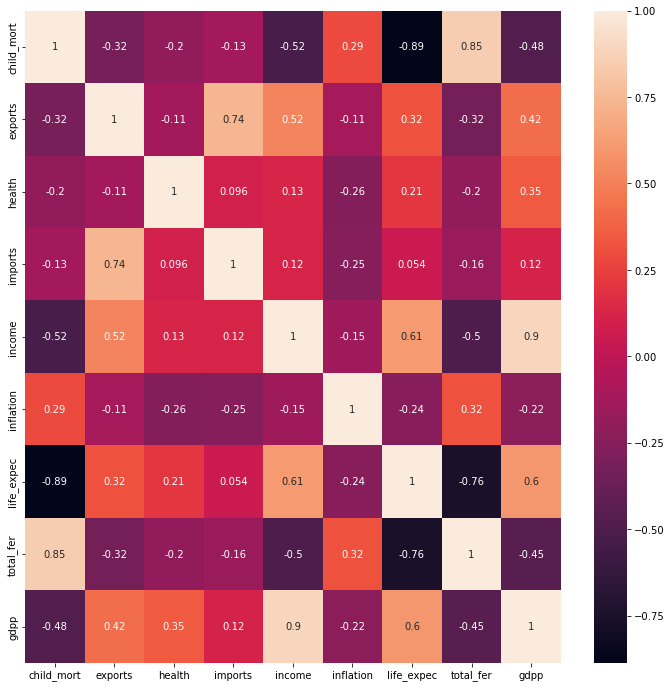

In [15]:
plt.rcParams['figure.figsize'] = 12, 12

sns.heatmap(data.corr(), annot=True)

Imports and Exports have very high positive correlation. (+0.74)

Life Expectancy and Child mortality has very high negative correlation. (-0.89)

Total Fertility and child mortality has a high correlation. (+0.85)

GDPP and Income has the heigest positive correlation. (+0.9)

Lifr Expectancy has fairly high correlation with Income. (+0.61)

GDPP nas high correlation with Life Expectancy. (+0.6)

Total Fertility has fairly high negative correlation with Life Expectancy. (-0.76) I found this inverse relation a bit interesting.

In [16]:
data.skew()

child_mort    1.450774
exports       2.445824
health        0.705746
imports       1.905276
income        2.231480
inflation     5.154049
life_expec   -0.970996
total_fer     0.967092
gdpp          2.218051
dtype: float64

We see positive skewness with all the features, except life expcetancy initially. However, with log transformation, that turned into negative skewness of much lower degree, except for health and total fertility features, which are still positively skewed. However, in order to keep the values genuine, all the original skewness was kept intact.

In [17]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
sData = pd.DataFrame(scale.fit_transform(data), columns = data.columns) # Scaled Data
sData.describe().transpose()

count          mean       std       min       25%       50%  \
child_mort  167.0 -2.659217e-17  1.003008 -0.887138 -0.746619 -0.471798   
exports     167.0  2.383323e-16  1.003008 -1.500192 -0.633337 -0.223528   
health      167.0  5.218713e-16  1.003008 -1.827827 -0.692211 -0.181001   
imports     167.0  2.871954e-16  1.003008 -1.939940 -0.691479 -0.148743   
income      167.0 -7.512288e-17  1.003008 -0.860326 -0.717456 -0.373808   
inflation   167.0  3.988825e-18  1.003008 -1.137852 -0.566641 -0.226950   
life_expec  167.0  3.616535e-16  1.003008 -4.337186 -0.592758  0.286958   
total_fer   167.0  3.124580e-16  1.003008 -1.191250 -0.763902 -0.356431   
gdpp        167.0  2.127373e-17  1.003008 -0.696801 -0.636660 -0.454431   

                 75%       max  
child_mort  0.592667  4.221297  
exports     0.374720  5.813835  
health      0.651541  4.047436  
imports     0.491353  5.266181  
income      0.294237  5.611542  
inflation   0.281636  9.129718  
life_expec  0.704258  1.380962  
total_fer   0.617525  3.009349  
gdpp        0.059421  5.036507

In [18]:
sData.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   -1.619092   
1   -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347    0.647866   
2   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274    0.670423   
3    2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   -1.179234   
4   -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749    0.704258   

   total_fer      gdpp  
0   1.902882 -0.679180  
1  -0.859973 -0.485623  
2  -0.038404 -0.465376  
3   2.128151 -0.516268  
4  -0.541946 -0.041817

In [19]:
data.head()

child_mort  exports  health  imports   income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9   1610.0       9.44        56.2   
1        16.6     28.0    6.55     48.6   9930.0       4.49        76.3   
2        27.3     38.4    4.17     31.4  12900.0      16.10        76.5   
3       119.0     62.3    2.85     42.9   5900.0      22.40        60.1   
4        10.3     45.5    6.03     58.9  19100.0       1.44        76.8   

   total_fer     gdpp  
0       5.82    553.0  
1       1.65   4090.0  
2       2.89   4460.0  
3       6.16   3530.0  
4       2.13  12200.0

<AxesSubplot:>

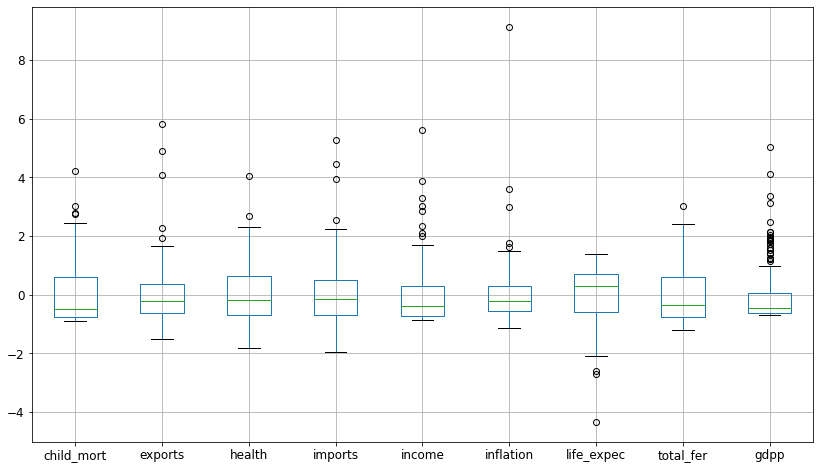

In [20]:
sData.boxplot(fontsize = 'large', figsize = (14, 8))

Except for Life Ecpectancy, all the boxplot have outliers only on the upper end. (This concurs with the observations made in pairplot)

GDPP has a lot of positive outliers.

Inflation has few outliers but, one has very high value which will affect the distribution.

Outliers wont be tampered with as they may contain genuine insight about the countries

# KMeans

In [21]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

In [23]:
from sklearn.cluster import KMeans

inertia = []
list_num_clusters = list(range(1,11))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(data)
    inertia.append(km.inertia_)

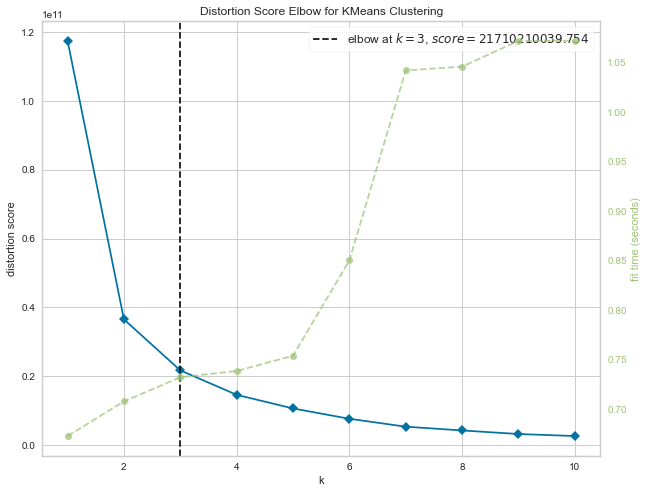

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
from yellowbrick.cluster import KElbowVisualizer

plt.rcParams['figure.figsize'] = 10, 8
visualizer = KElbowVisualizer(KMeans(), k = (1, 11))
visualizer.fit(data)
visualizer.poof()

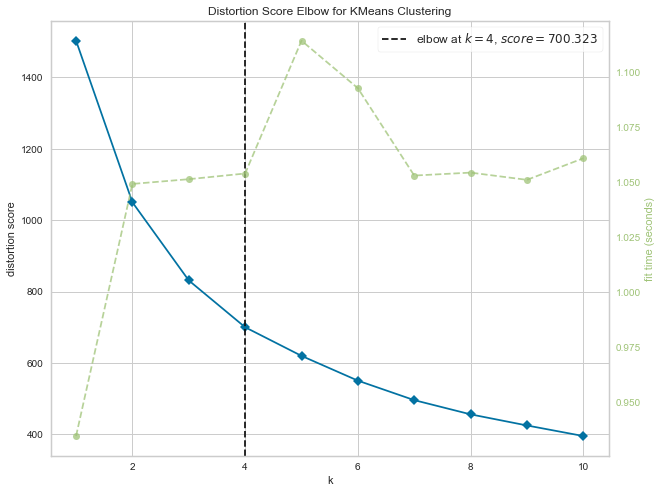

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
plt.rcParams['figure.figsize'] = 10, 8
visualizer = KElbowVisualizer(KMeans(), k = (1, 11))
visualizer.fit(sData)
visualizer.poof()

So we see that the optimal number of clusters for KMeans would be 4.

# PCA

In [26]:
from sklearn.decomposition import PCA
pca = PCA()
pcaData = pd.DataFrame(pca.fit_transform(sData))
pca.explained_variance_

array([4.16057017, 1.55566165, 1.1774338 , 1.00077724, 0.66459866,
       0.224928  , 0.1141221 , 0.08884738, 0.06727787])

In [27]:
from sklearn.decomposition import PCA

pca_list = list()
feature_weight_list = list()

# Fit a range of PCA models

for n in range(1, 6):
    
    # Create and fit the model
    PCAmod = PCA(n_components=n)
    PCAmod.fit(sData)
    
    # Store the model and variance
    pca_list.append(pd.Series({'n':n, 'model':PCAmod,
                               'var': PCAmod.explained_variance_ratio_.sum()}))
    
    # Calculate and store feature importances
    abs_feature_values = np.abs(PCAmod.components_).sum(axis=0)
    feature_weight_list.append(pd.DataFrame({'n':n, 
                                             'features': sData.columns,
                                             'values':abs_feature_values/abs_feature_values.sum()}))
    
pca_df = pd.concat(pca_list, axis=1).T.set_index('n')
pca_df

model       var
n                               
1  PCA(n_components=1)  0.459517
2  PCA(n_components=2)  0.631334
3  PCA(n_components=3)  0.761376
4  PCA(n_components=4)  0.871908
5  PCA(n_components=5)   0.94531

In [28]:
features_df = (pd.concat(feature_weight_list)
               .pivot(index='n', columns='features', values='values'))

features_df

features  child_mort   exports      gdpp    health   imports    income  \
n                                                                        
1           0.148263  0.100332  0.138765  0.053308  0.057070  0.140814   
2           0.122348  0.179218  0.087638  0.078700  0.166480  0.084104   
3           0.088218  0.143170  0.077183  0.136125  0.155732  0.099292   
4           0.102896  0.106179  0.111130  0.147592  0.122460  0.113269   
5           0.096639  0.090174  0.104183  0.161160  0.119453  0.111382   

features  inflation  life_expec  total_fer  
n                                           
1          0.068270    0.150496   0.142682  
2          0.040272    0.129569   0.111671  
3          0.115998    0.104780   0.079501  
4          0.101060    0.098187   0.097227  
5          0.139810    0.087880   0.089319

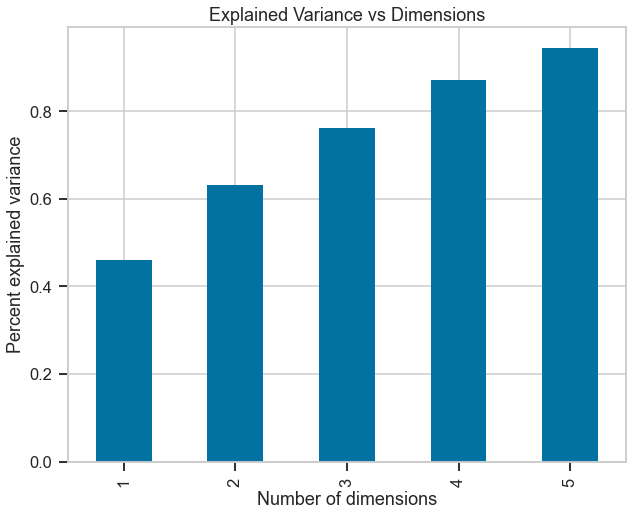

In [29]:
sns.set_context('talk')
ax = pca_df['var'].plot(kind='bar')

ax.set(xlabel='Number of dimensions',
       ylabel='Percent explained variance',
       title='Explained Variance vs Dimensions');

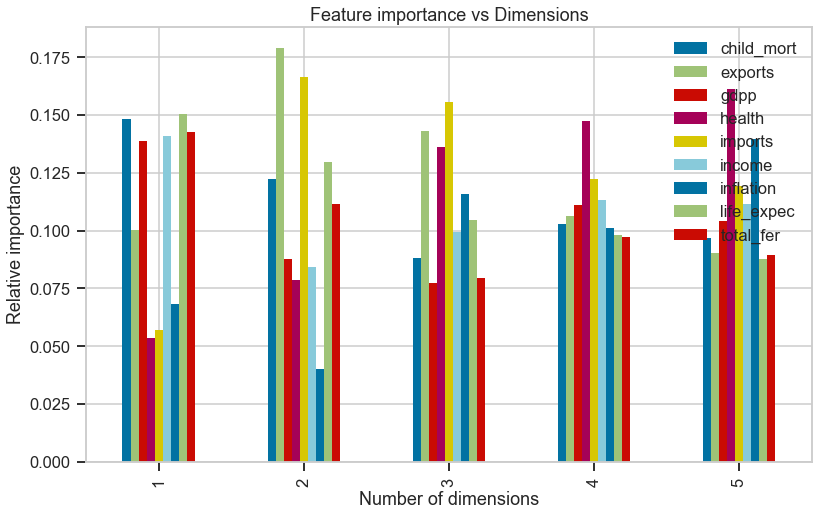

In [30]:
ax = features_df.plot(kind='bar', figsize=(13,8))
ax.legend(loc='upper right')
ax.set(xlabel='Number of dimensions',
       ylabel='Relative importance',
       title='Feature importance vs Dimensions');

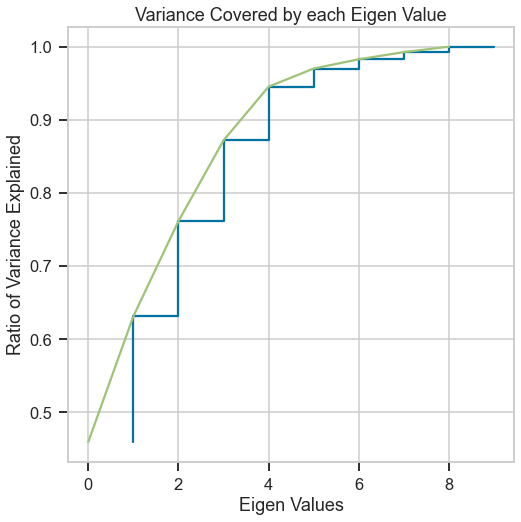

In [31]:
plt.rcParams['figure.figsize'] = 8, 8
plt.step(list(range(1,10)), np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of Variance Explained')
plt.title('Variance Covered by each Eigen Value')
plt.show()

Variance covered tapers off after the 4th Eigen Value. It covers more than 90% of the variance. So I will use these 4 values moving forward

In [32]:
pcaData.drop(columns = [4,5,6,7,8], inplace = True)
pcaData.head()

0         1         2         3
0 -2.913025  0.095621 -0.718118  1.005255
1  0.429911 -0.588156 -0.333486 -1.161059
2 -0.285225 -0.455174  1.221505 -0.868115
3 -2.932423  1.695555  1.525044  0.839625
4  1.033576  0.136659 -0.225721 -0.847063

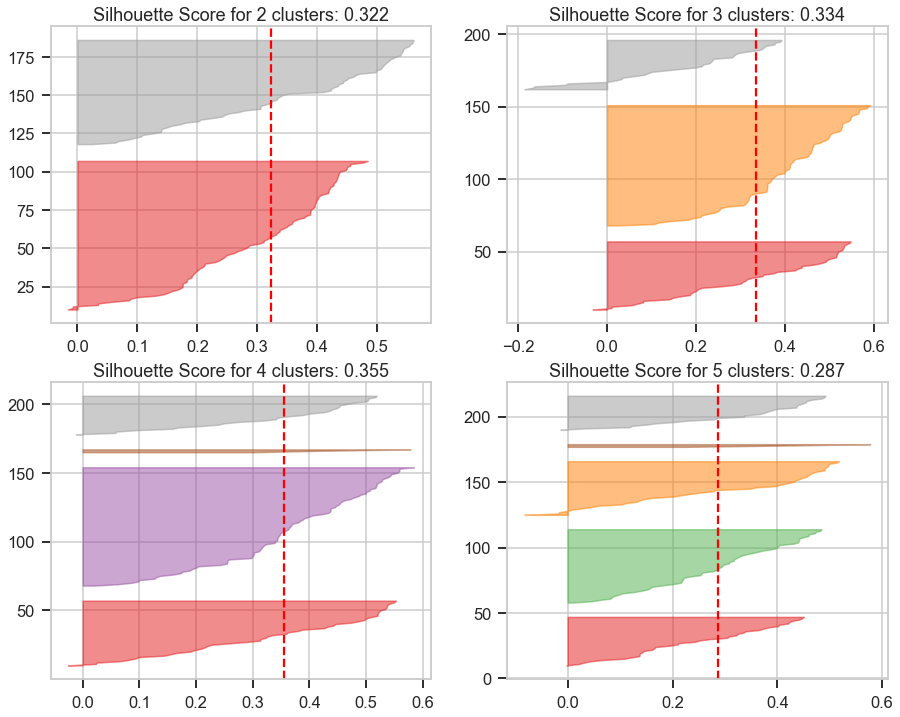

In [33]:
# Silhouette Scores of PCA Data
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score as sil_score

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (15,12))
ax = [ax1, ax2, ax3, ax4]

for i in range(2,6):
    modelKM = KMeans(n_clusters = i)
    silViz = SilhouetteVisualizer(modelKM, ax=ax[i-2])
    silViz.fit(pcaData)
    txtx = 'Silhouette Score for ' + str(i) + ' clusters: '+ str(round(sil_score(pcaData, modelKM.labels_), 3))
    ax[i-2].set_title(txtx)
#   silViz.poof()

In [34]:
modelKM = KMeans(n_clusters = 4)
modelKM.fit(pcaData)
pcaPredKM = pd.Series(modelKM.labels_)
print(pd.concat({
    "count" : pcaPredKM.value_counts(), 
    "Percent" : round(pcaPredKM.value_counts(normalize = True)*100, 2)
}, axis = 1))

   count  Percent
0     86    51.50
3     48    28.74
1     30    17.96
2      3     1.80


In [35]:
modelKM = KMeans(n_clusters = 4)
modelKM.fit(sData)
sPredKM = pd.Series(modelKM.labels_)
print(pd.concat({
    "count" : sPredKM.value_counts(), 
    "Percent" : round(sPredKM.value_counts(normalize = True)*100, 2)
}, axis = 1))

   count  Percent
1     88    52.69
2     46    27.54
3     30    17.96
0      3     1.80


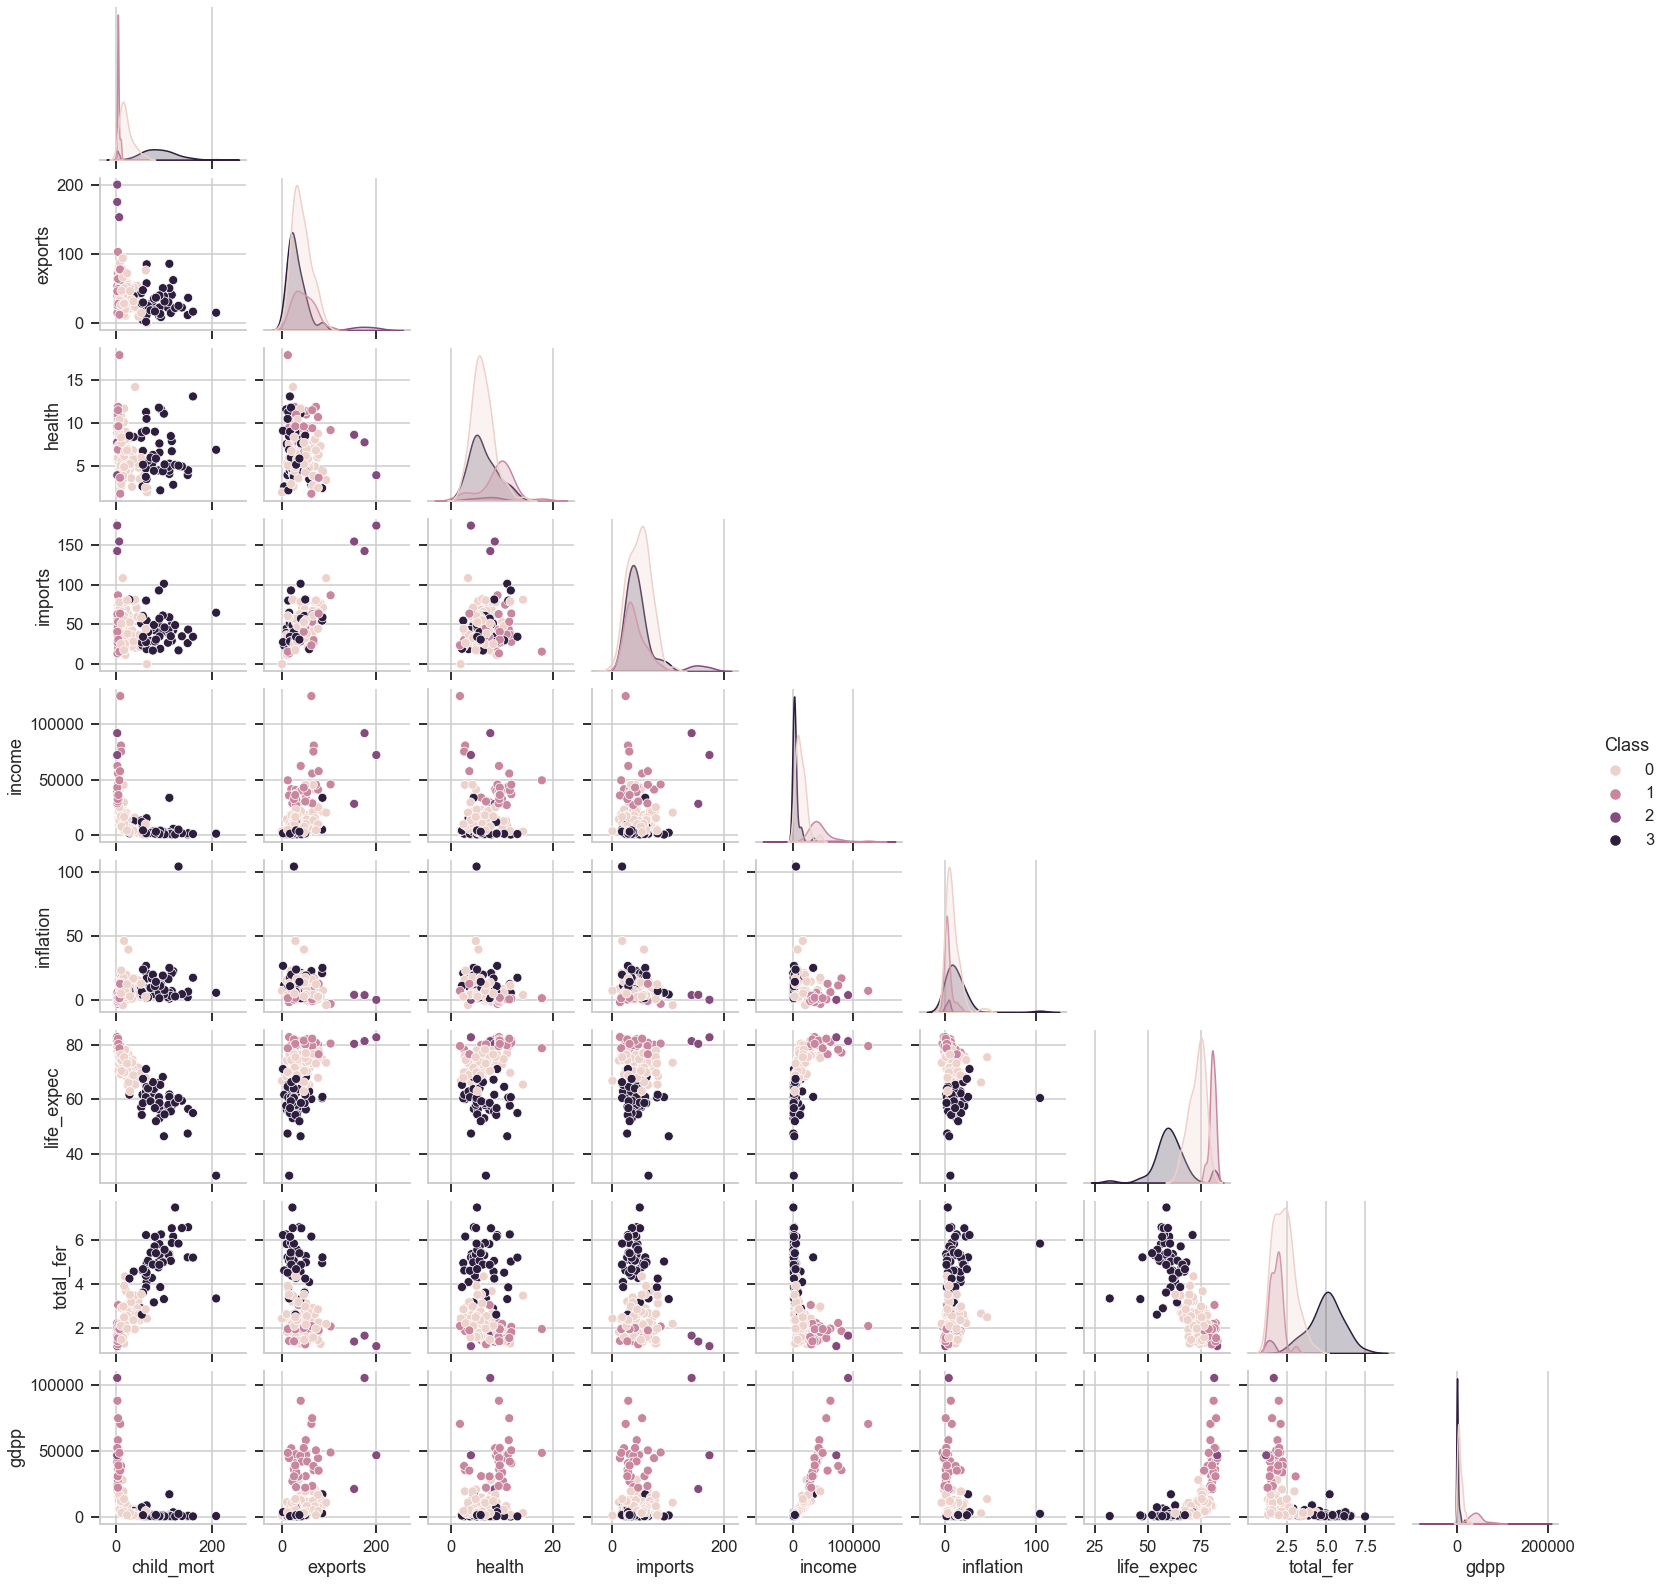

In [36]:
dataKM = data.copy()
dataKM['Class'] = pcaPredKM
sns.pairplot(dataKM, hue = "Class", corner = True)

The clusters formed are of simillar sizes by both data(PCA and Scaled).

The largest group covers over 50% (~86) of the countries in the dataset.

The second biggest group covres approximately 27% (~45) of the countries.

The next group covers approximately 30% (~30) of the overall countries

And finally the smallest group covers only 1.8% (3) of the countyies.

A group of just 3 countries seems a bit unwarranteed. Lets visualuze the data according to classification to deternime what are the characteristic of the countries in each group.

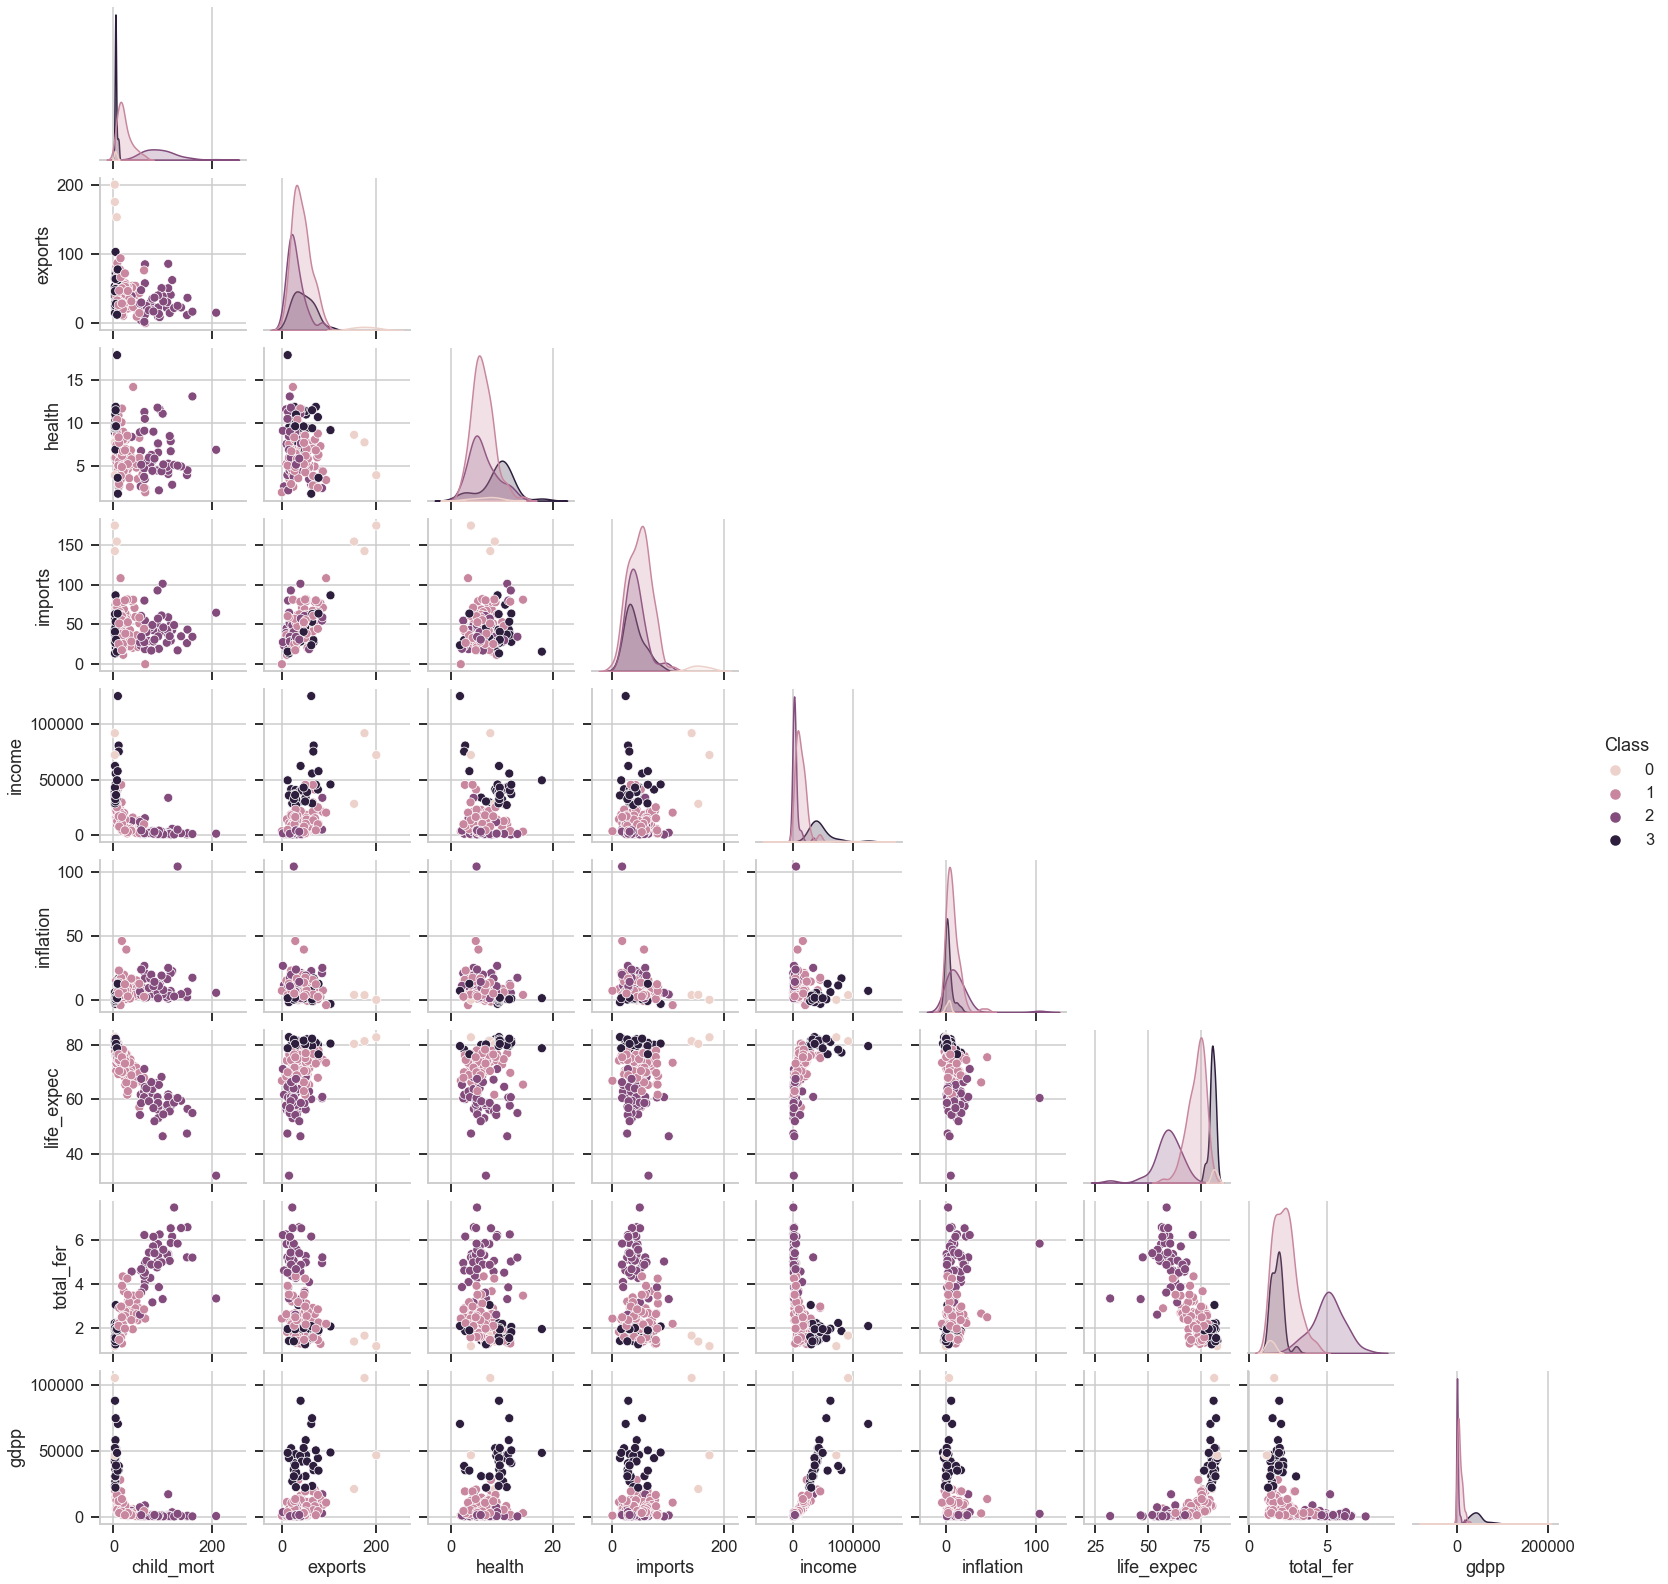

In [37]:
dataKM['Class'] = sPredKM
sns.pairplot(dataKM, hue = "Class", corner = True)

In [38]:
from sklearn.metrics import davies_bouldin_score

print('Silhouette Score:', '%.2f'%sil_score(sData, sPredKM))
print('Davies Bouldin Score:', '%.2f'%davies_bouldin_score(sData, sPredKM))

Silhouette Score: 0.30
Davies Bouldin Score: 1.04


# Hierarchical Clustering

In [39]:
from sklearn.cluster import AgglomerativeClustering

ag = AgglomerativeClustering(n_clusters=2, linkage='ward', compute_full_tree=True)
ag = ag.fit(data)
data['agglom'] = ag.fit_predict(data)

In [40]:
data.head()

child_mort  exports  health  imports   income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9   1610.0       9.44        56.2   
1        16.6     28.0    6.55     48.6   9930.0       4.49        76.3   
2        27.3     38.4    4.17     31.4  12900.0      16.10        76.5   
3       119.0     62.3    2.85     42.9   5900.0      22.40        60.1   
4        10.3     45.5    6.03     58.9  19100.0       1.44        76.8   

   total_fer     gdpp  agglom  
0       5.82    553.0       0  
1       1.65   4090.0       0  
2       2.89   4460.0       0  
3       6.16   3530.0       0  
4       2.13  12200.0       0

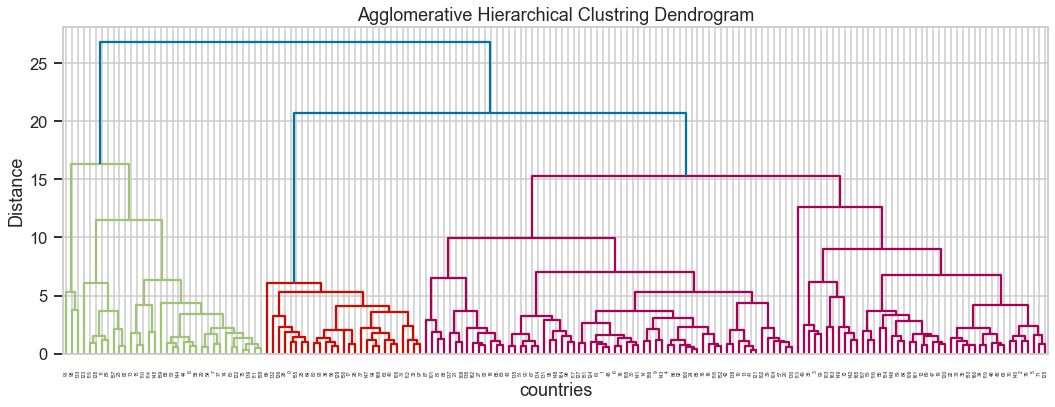

In [58]:
from scipy.cluster.hierarchy import linkage, cophenet, dendrogram
from scipy.spatial.distance import pdist

link = linkage(sData, metric = 'euclidean', method = 'ward')
c, coph_dist = cophenet(link, pdist(sData))

plt.figure(figsize = (15,6))
plt.title('Agglomerative Hierarchical Clustring Dendrogram')
plt.xlabel('countries')
plt.ylabel('Distance')
dendrogram(link)
plt.tight_layout()

3 will be optimal number of clusters formed.

In [43]:
from sklearn.cluster import AgglomerativeClustering as agc

modelAGC = agc(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
modelAGC.fit(sData)
sPredAGC = pd.Series(modelAGC.labels_)
print(pd.concat({'count' : sPredAGC.value_counts(), 
                 'percent' : round(sPredAGC.value_counts(normalize = True)*100, 2)}, 
                axis = 1 ))

   count  percent
1    106    63.47
0     34    20.36
2     27    16.17


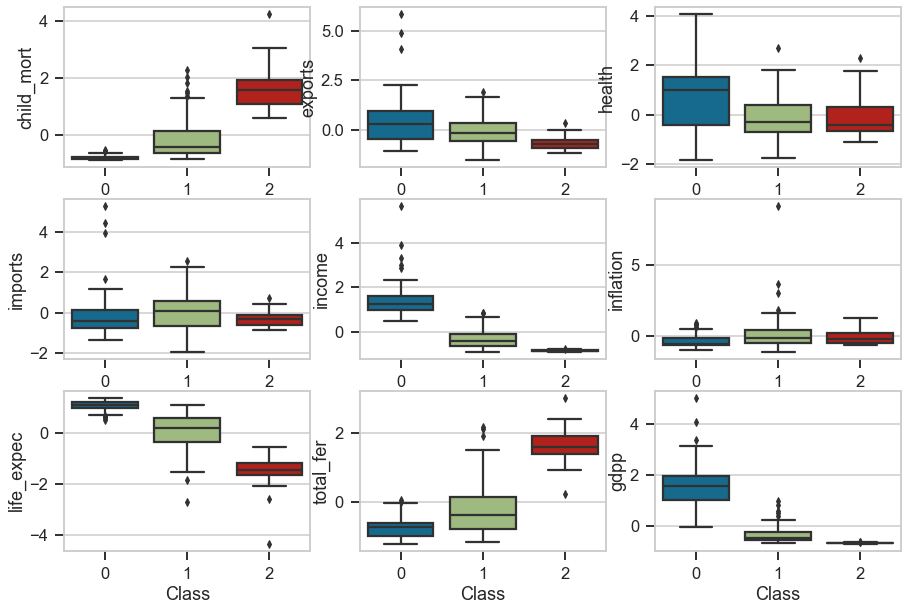

In [44]:
sDataAGC = sData.copy()
sDataAGC['Class'] = sPredAGC

fig, (ax1,ax2,ax3) = plt.subplots(3, 3, figsize = (15, 10))
ax = [ax1, ax2, ax3]
j, k = 0, 0 
for i in sDataAGC.drop(columns = "Class").columns:
    sns.boxplot(x = "Class", y = i, data = sDataAGC, ax = ax[j][k])
    if divmod(k,2) == (1,0): 
        j += 1
        k = 0
    else: k += 1
plt.show()

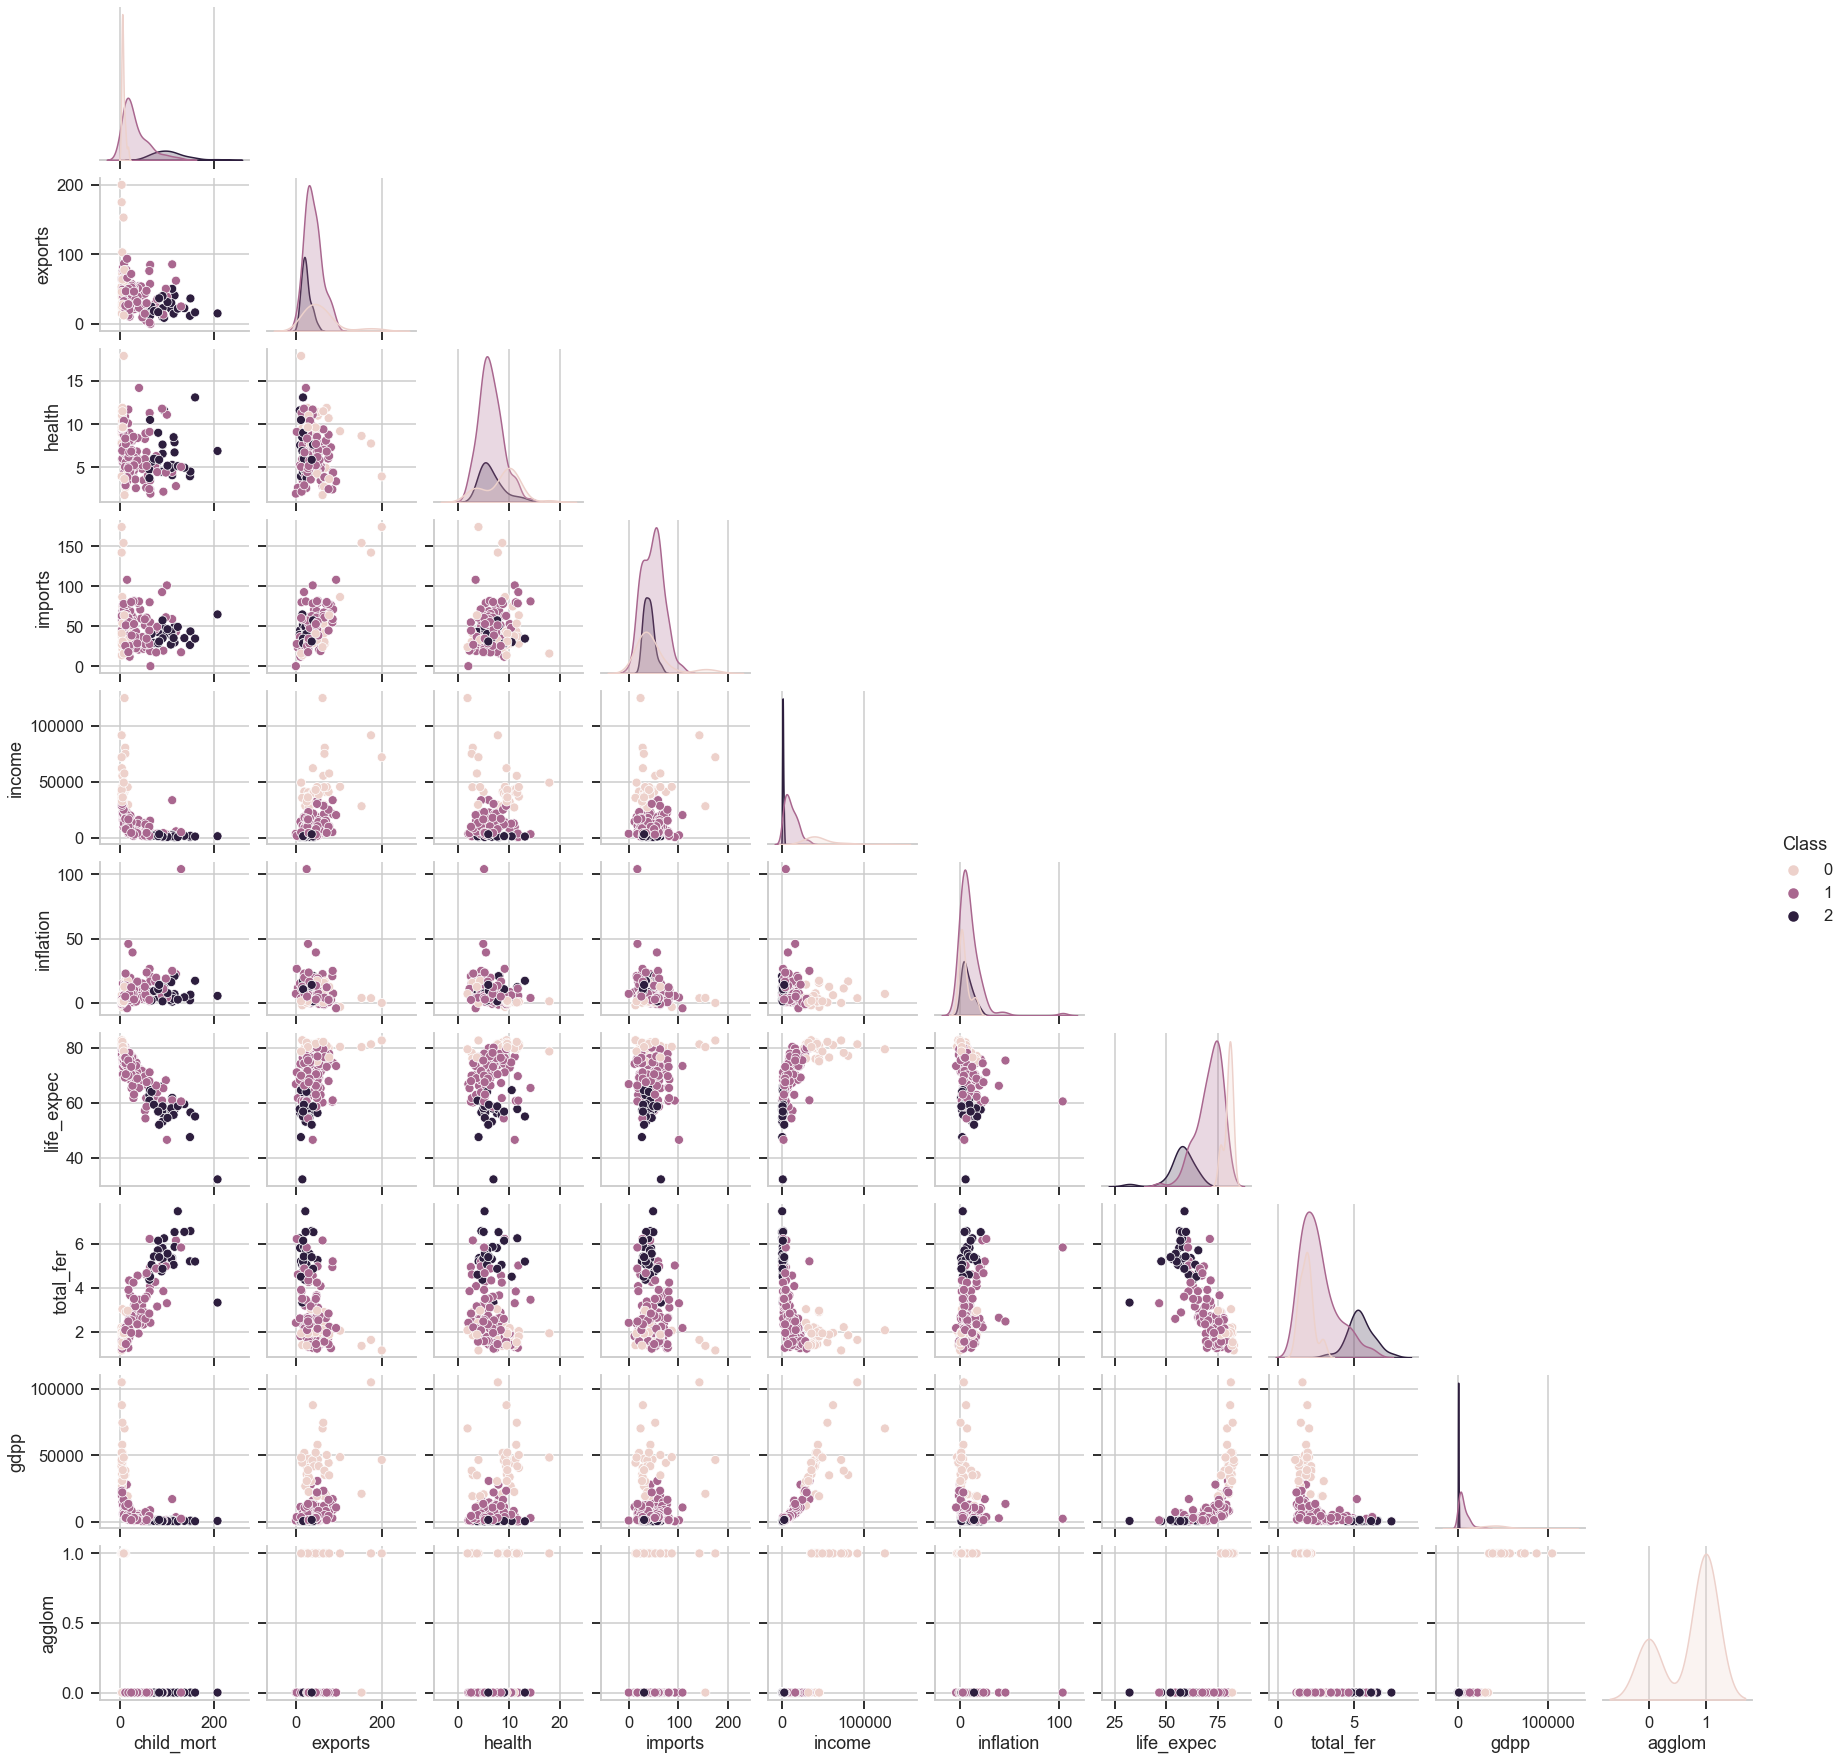

In [45]:
dataAGC = data.copy()
dataAGC['Class'] = sPredAGC
sns.pairplot(dataAGC, hue = 'Class', corner = True)

All the clusters overlap eachother at many points.

In [46]:
print('Silhouette Score:', '%.2f'%sil_score(sData, sPredAGC))
print('Davies Bouldin Score:', '%.2f'%davies_bouldin_score(sData, sPredAGC))

Silhouette Score: 0.25
Davies Bouldin Score: 1.30


# DBSCAN

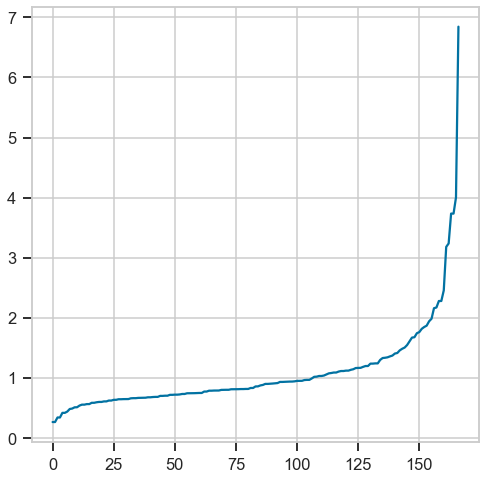

In [47]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(sData)
distances, indices = nbrs.kneighbors(sData)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.rcParams['figure.figsize'] = 8,8
plt.plot(distances)

Optimal value of Epsilon is 1.3 as it forms elbow like shape around that point.¶

In [48]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps = 1.3, min_samples = 8)# minimum samples is set to 8
db.fit(sData)
sPredDB = pd.Series(db.labels_)
print(pd.concat({'count' : sPredDB.value_counts(), 
                 'percent' : round(sPredDB.value_counts(normalize = True)*100, 2)}, 
                axis = 1 ))

    count  percent
 0     76    45.51
-1     53    31.74
 2     20    11.98
 1     18    10.78


This gives 3 clsters of 0, 1, and 2. Countries with -1 values are noisy points and are not part of any clusters.

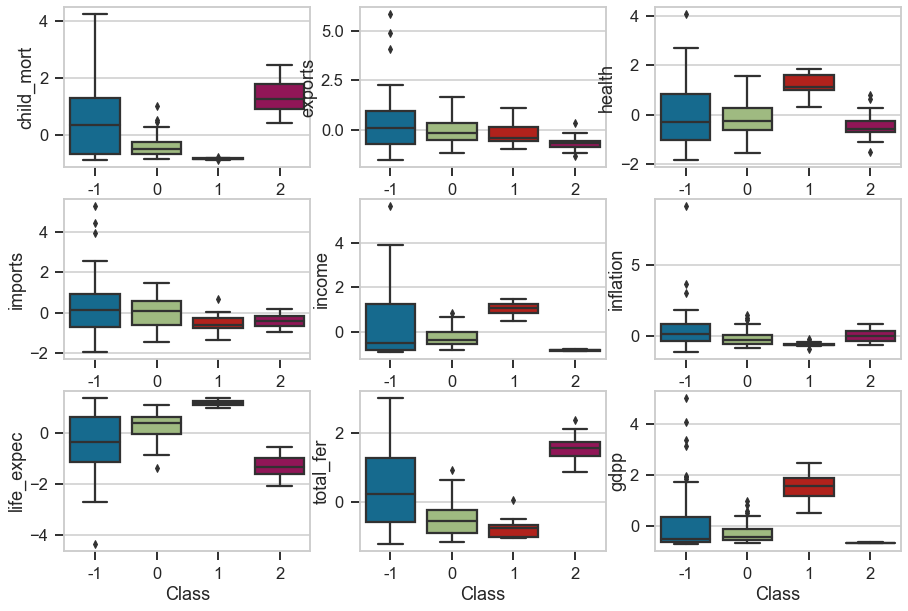

In [49]:
sDataDB = sData.copy()
sDataDB['Class'] = sPredDB

fig, (ax1,ax2,ax3) = plt.subplots(3, 3, figsize = (15, 10))
ax = [ax1, ax2, ax3]
j, k = 0, 0 
for i in sDataDB.drop(columns = "Class").columns:
    sns.boxplot(x = "Class", y = i, data = sDataDB, ax = ax[j][k])
    if divmod(k,2) == (1,0): 
        j += 1
        k = 0
    else: k += 1
plt.show()

In [50]:
print('Silhouette Score:', '%.2f'%sil_score(sData, sPredDB))
print('Davies Bouldin Score:', '%.2f'%davies_bouldin_score(sData, sPredDB))

Silhouette Score: 0.13
Davies Bouldin Score: 2.24


Selecting the best Clustering Method

1) Using Silhouette Score : Higher values are better. Values range from -1 to 1.

2) Using Davies Bouldin Score : The minimum score is zero, with lower values indicating better clustering.

DBSCAN has the lowest Silhouette score and a very high Davies Bouldin score which indicates overall clustering is not optimal.

Also, DBSCAN put a lot of countries(53) in noisy group and we cannot have any country that needs help be ignored. So I wont be using clusters formed by DBSCAN

KMeans Clustering gave the best Silhouette score and Davies Bouldin score of 0.3 and 1.04 respectively.


Moving ahead the clusters fromed by KMeans Clustering will be used.


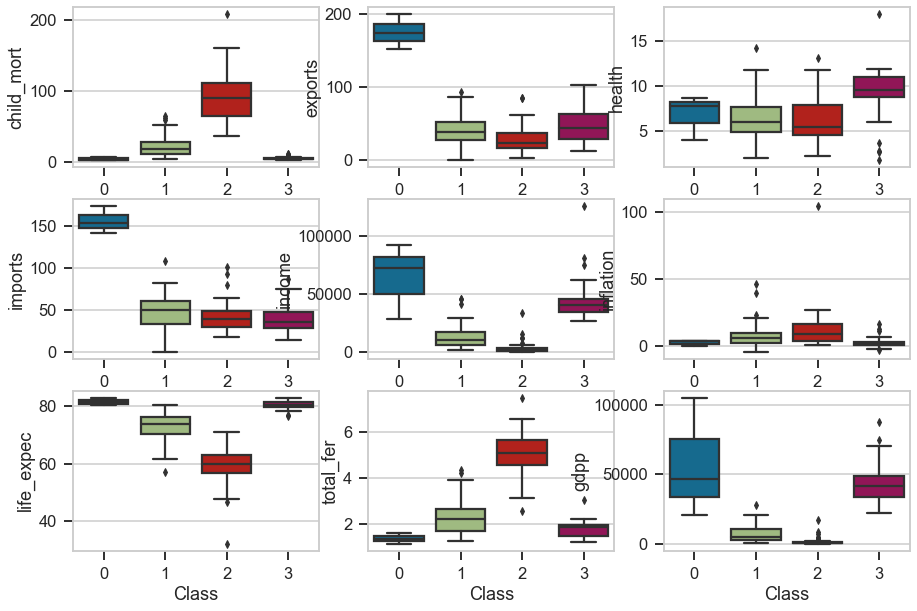

In [51]:
fig, (ax1,ax2,ax3) = plt.subplots(3, 3, figsize = (15, 10))
ax = [ax1, ax2, ax3]
j, k = 0, 0 
for i in dataKM.drop(columns = "Class").columns:
    sns.boxplot(x = "Class", y = i, data = dataKM, ax = ax[j][k])
    if divmod(k,2) == (1,0): 
        j += 1
        k = 0
    else: k += 1
plt.show()

In [52]:
print(dataKM.Class.value_counts())
dataKM.groupby('Class').mean()

1    88
2    46
3    30
0     3
Name: Class, dtype: int64


child_mort     exports    health     imports        income  inflation  \
Class                                                                          
0        4.133333  176.000000  6.793333  156.666667  64033.333333   2.468000   
1       21.743182   41.316920  6.259318   48.075749  12972.386364   7.430580   
2       93.841304   28.837174  6.346957   42.128261   3738.978261  12.087065   
3        4.953333   45.826667  9.168667   39.736667  45250.000000   2.742200   

       life_expec  total_fer          gdpp  
Class                                       
0       81.433333   1.380000  57566.666667  
1       72.755682   2.293295   6912.636364  
2       59.232609   5.054348   1826.130435  
3       80.376667   1.795333  43333.333333

#### Findings:

 - Class with 47 countries: It has higest child mortality rate, lowest GDPP & Income, and its inflation is significantly higher than other groups. Countries in this group will be most disadvantaged and Undeveloped. The need help the most and should be 1st priority.


 - Class with 3 countries: It has the lowest child mortality rate, highest GDPP & Income, and has the lowest Inflation. This group contains most Well Developed countries with stable economies and health-care given that it has the highest life expectancy. These countries do not need any help and should have least priority in the list of countries requiring aid.


 - Class with 87 countries: It has the 2nd higest child mortality rate, 2nd lowest GDPP & Income, and even though its inflation is 2nd highest, its not significantly high. These countries are developing contries. These countries might need help and should be 2nd priority in the list of countries requiring aid.


 - Class with 30 countries: It has 2nd lowest child mortality rate, 2nd highest GDPP & Income. Also its inflation is 2nd lowest. It has significantly higher spendings on health. This group has Developed countries. These countries do not need help and can be 3rd priority in the list of countries requiring aid.

Renaming the Clusters according to their priorities:

Development	  | Classification	        |Priority
    -          -                         -
Undeveloped   |	Need help	            | 1
Developing	  | Might need help	        | 2
Developed	  |Do not need imediate help| 3
Well Developed|	Do not need help	    | 4

In [53]:
p = dataKM.Class.value_counts()

dataKM.Class[dataKM.Class == p.index[0]] = 22
dataKM.Class[dataKM.Class == p.index[1]] = 11
dataKM.Class[dataKM.Class == p.index[2]] = 33
dataKM.Class[dataKM.Class == p.index[3]] = 44

dataKM.Class.replace({22:2, 11:1, 33:3, 44:4 }, inplace = True)
dataKM.rename(columns = {"Class": "Priority"}, inplace = True)

dataKM.Priority.value_counts()

2    88
1    46
3    30
4     3
Name: Priority, dtype: int64

In [54]:
cat = {1: 'Undeveloped', 2: 'Developing', 3: 'Developed', 4: 'Well Developed'}

dataKM['country'] = data_main['country']
dataKM.Priority.replace(cat, inplace = True)

In [55]:
import plotly.express as px

px.choropleth(data_frame = dataKM, locationmode = 'country names', locations = 'country', 
              color = dataKM['Priority'], title = 'Countries by category that need help',
              color_discrete_map = {'Undeveloped':'#DB1C18', 'Developing':'#EBB331',
                                  'Developed':'#67E232', 'Well Developed':'#51A2DB'} ,
              projection = 'equirectangular')

Most of the Underdeveloped countries seems to be in African Continent.



In [56]:
px.choropleth(data_frame = dataKM, locationmode = 'country names', locations = 'country', 
             color = dataKM.Priority, title = 'Countries in African continent',
             color_discrete_map = {'Undeveloped':'#DB1C18', 'Developing':'#EBB331',
                                  'Developed':'#67E232', 'Well Developed':'#51A2DB'},
             projection='equirectangular', scope = 'africa')

In [57]:
px.choropleth(data_frame = dataKM, locationmode = 'country names', locations = 'country', 
             color = dataKM.Priority, title = 'Countries in Asian continent',
             color_discrete_map = {'Undeveloped':'#DB1C18', 'Developing':'#EBB331',
                                  'Developed':'#67E232', 'Well Developed':'#51A2DB'},
             scope = 'asia')